In [1]:
# Import
import numpy as np
import pandas as pd
from scipy.linalg import eigh 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D

In [2]:
## Load MNIST dataset
train_df = pd.read_csv('./mnist_train.csv')
train_df_array = train_df.values
# train_df.head()
test_df = pd.read_csv('./mnist_test.csv')
test_df_array = test_df.values
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Create train and test arrays
X_train = train_df_array[:, 1:]
y_train = train_df_array[:, 0]
X_test = test_df_array[:, 1:]
y_test = test_df_array[:, 0]

# Normalize
def normalize(X):
    # X has the shape (examples * dimension)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)+1e-100
    return (X-mean)/std, mean, std

X_train, train_mean, train_std = normalize(X_train)
X_test, test_mean, test_std = normalize(X_test)
print(X_train.shape, y_train.shape)

# Split the dataset into small batches
def K_duplicates(y, K):
    counts=[0 for k in range(10)]
    indices=[]
    for i in range(len(y)):
        if counts[y[i]]>=K : continue
        indices.append(i)
        counts[y[i]]+=1
    # print(counts)
    return indices

indices = K_duplicates(y_train, 60000)
corresponding_digits = y_train[indices]
print(corresponding_digits[:5])

(60000, 784) (60000,)
[5 0 4 1 9]


In [4]:
# Covariance Matrix and Reduced dimension representation
Covariance_Matrix = np.matmul(X_train.T, X_train)
eigen_values, eigen_vectors = eigh(Covariance_Matrix, eigvals=(782,783))
eigen_vectors = eigen_vectors.T
print(Covariance_Matrix.shape, eigen_vectors.shape)
reduced_dim_reps = np.matmul(eigen_vectors, X_train.T)
print(reduced_dim_reps.shape)

(784, 784) (2, 784)
(2, 60000)


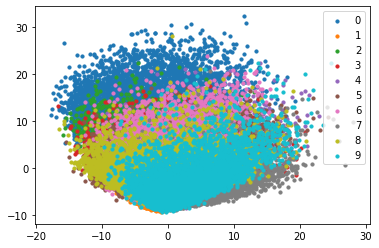

In [5]:
# Plot the low dimensional representations with their corresponding labels
figure, axes = plt.subplots()
for digit in np.unique(corresponding_digits):
    index = np.where(corresponding_digits == digit)
    axes.scatter(reduced_dim_reps[:, index][0], reduced_dim_reps[:, index][1], label=digit, s=10)
axes.legend()
plt.show()

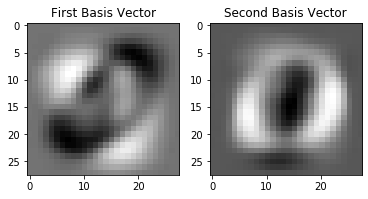

In [6]:
# Plot the basis vectors
figure, axes = plt.subplots(1, 2)
side_length = int(np.sqrt(eigen_vectors.shape[1]))
first_basis_vector = eigen_vectors[0].reshape(side_length, side_length)
axes[0].imshow(first_basis_vector, interpolation = "none", cmap = "gray")
axes[0].set_title("First Basis Vector")
second_basis_vector = eigen_vectors[1].reshape(side_length, side_length)
axes[1].imshow(second_basis_vector, interpolation = "none", cmap = "gray")
axes[1].set_title("Second Basis Vector")
plt.show()

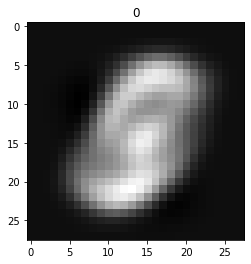

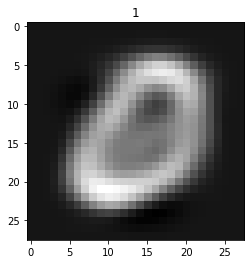

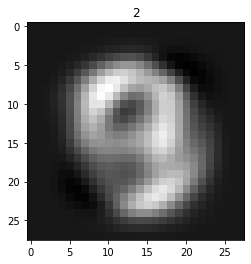

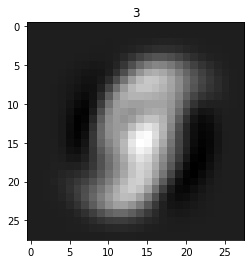

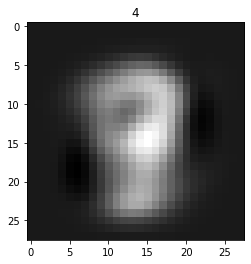

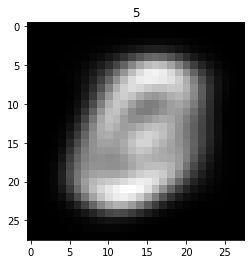

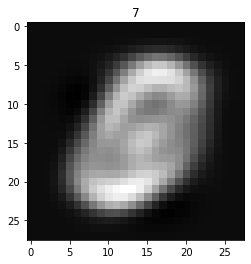

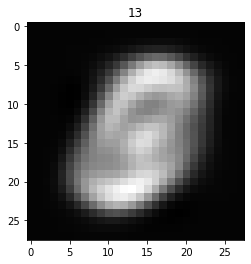

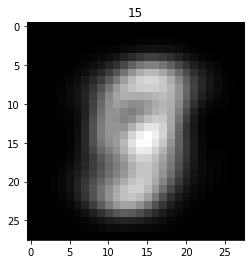

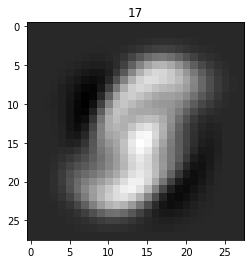

In [7]:
# Plotting the reconstructed samples for each digit
indices = K_duplicates(corresponding_digits, 1)
reconstructed_samples=np.matmul(eigen_vectors.T, reduced_dim_reps).T
unnormalized_samples=reconstructed_samples*(train_std+1e-100)+train_mean
for index in indices:
    reconstructed_array = np.reshape(unnormalized_samples[index, :], (side_length, side_length))
    plt.imshow(reconstructed_array, interpolation = "none", cmap = "gray")
    plt.title(str(index))
    plt.show()

In [8]:
# Covariance Matrix and Reduced dimension representation
Covariance_Matrix = np.matmul(X_train.T, X_train)
eigen_values, eigen_vectors = eigh(Covariance_Matrix, eigvals=(781,783))
eigen_vectors = eigen_vectors.T
print(Covariance_Matrix.shape, eigen_vectors.shape)
reduced_dim_reps = np.matmul(eigen_vectors, X_train.T)
print(reduced_dim_reps.shape)

(784, 784) (3, 784)
(3, 60000)


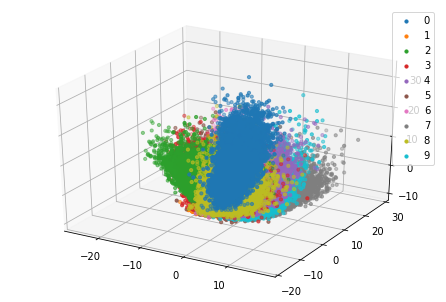

In [9]:
# Plot the low dimensional representations with their corresponding labels
figure = plt.figure()
axes = Axes3D(figure)
for digit in np.unique(corresponding_digits):
    index = np.where(corresponding_digits == digit)
    axes.scatter(reduced_dim_reps[:, index][0], reduced_dim_reps[:, index][1], 
                 reduced_dim_reps[:, index][2], label=digit, s=10)
axes.legend()
plt.show()

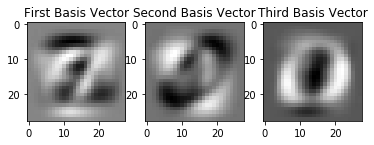

In [10]:
# Plot the basis vectors
figure, axes = plt.subplots(1, 3)
side_length = int(np.sqrt(eigen_vectors.shape[1]))
first_basis_vector = eigen_vectors[0].reshape(side_length, side_length)
axes[0].imshow(first_basis_vector, interpolation = "none", cmap = "gray")
axes[0].set_title("First Basis Vector")
second_basis_vector = eigen_vectors[1].reshape(side_length, side_length)
axes[1].imshow(second_basis_vector, interpolation = "none", cmap = "gray")
axes[1].set_title("Second Basis Vector")
third_basis_vector = eigen_vectors[2].reshape(side_length, side_length)
axes[2].imshow(third_basis_vector, interpolation = "none", cmap = "gray")
axes[2].set_title("Third Basis Vector")
plt.show()

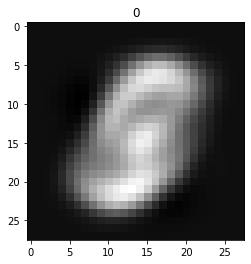

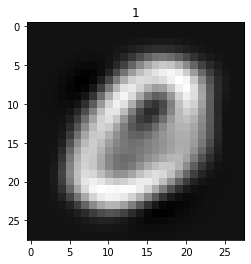

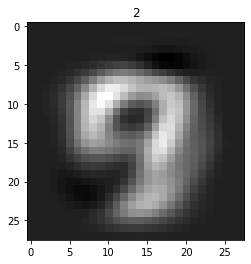

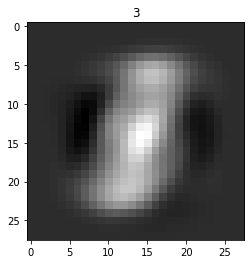

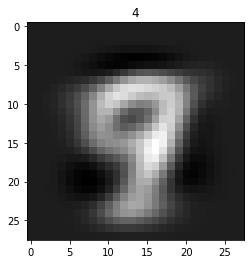

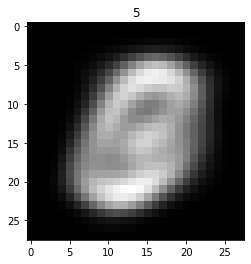

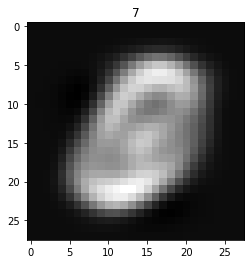

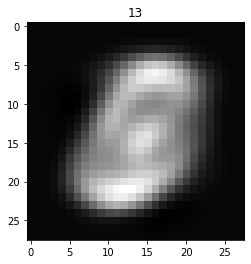

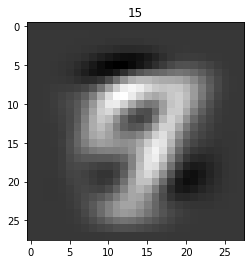

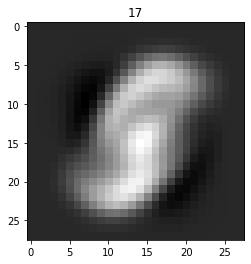

In [11]:
# Plotting the reconstructed samples for each digit
indices = K_duplicates(corresponding_digits, 1)
reconstructed_samples=np.matmul(eigen_vectors.T, reduced_dim_reps).T
unnormalized_samples=reconstructed_samples*(train_std+1e-100)+train_mean
for index in indices:
    reconstructed_array = np.reshape(unnormalized_samples[index, :], (side_length, side_length))
    plt.imshow(reconstructed_array, interpolation = "none", cmap = "gray")
    plt.title(str(index))
    plt.show()